In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Pandas profiling
import pandas_profiling as pp

# missingno
import missingno as msn
#datetime
import datetime as dt
from datetime import date

In [3]:
#reading the csv file
data_path = '/home/james/Desktop/KPMG virtual internship/data/CustomerDemographic.csv'
data = pd.read_csv(data_path, encoding='latin-1', parse_dates=['DOB'])

In [4]:
data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,02/01/2018,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
data.shape

(4000, 13)

## EDA

### Missing data

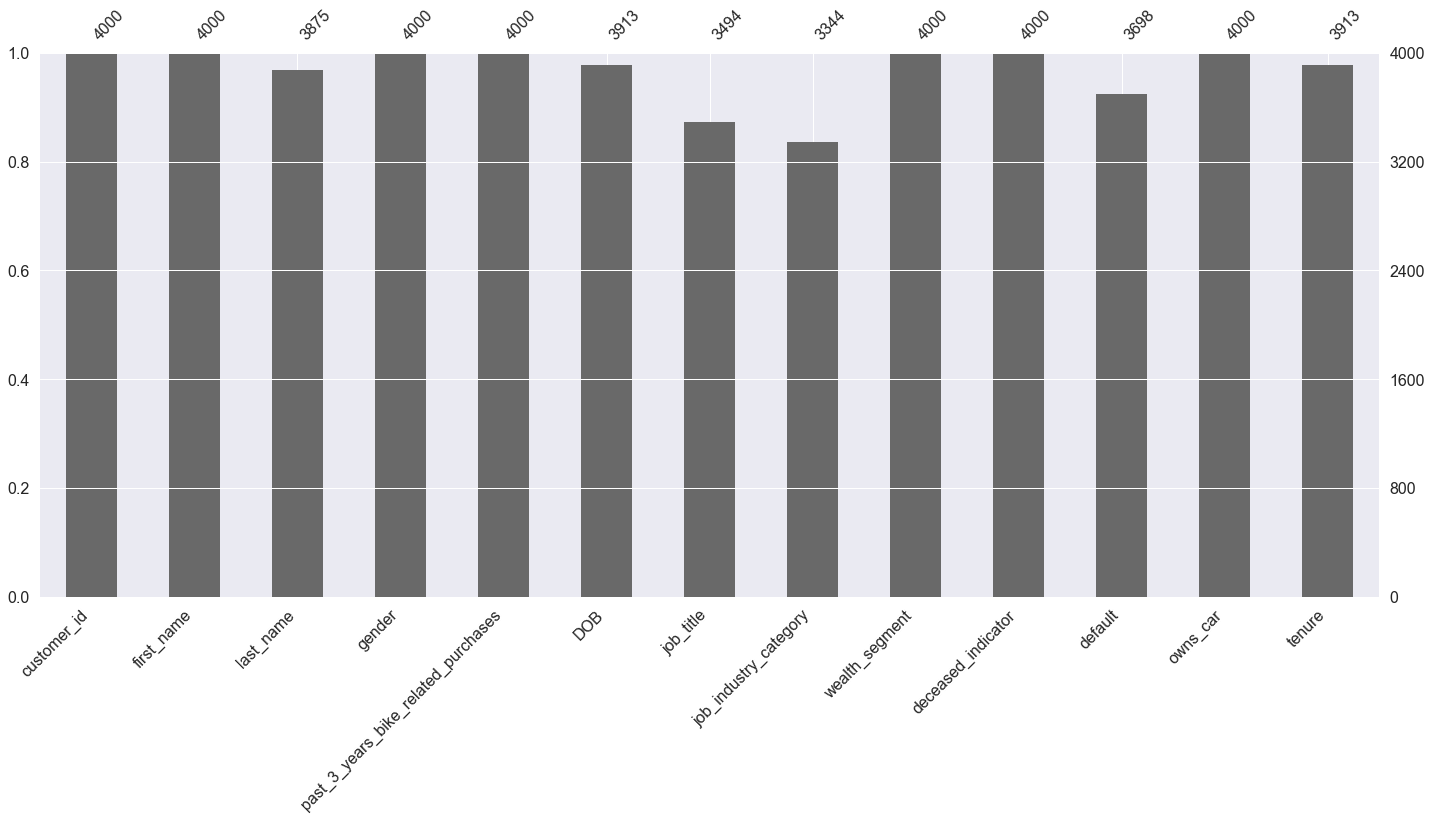

In [6]:
# use missingno bar 
msn.bar(data)
plt.show()

### findings:
#### first_name, DOB, job_title, job_industry_category, default and tenure has missing values

In [7]:
# drop the missing cells from the last name, job_title, job_industry_category, DOB and tenure columns
data.dropna(subset=['last_name','job_title', 'job_industry_category','DOB', 'tenure'], axis=0,inplace=True)

In [8]:
# drop default column
data = data.drop('default', axis=1)

In [9]:
#pp.ProfileReport(data)

In [10]:
data.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                        float64
dtype: object

In [11]:
# dealing with DOB
data = data.assign(year=data.DOB.dt.year,
                  month = data.DOB.dt.month,
                  day = data.DOB.dt.day)

In [12]:
data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,day
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,12
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,16
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,20
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,10
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,11


### incorrect values

In [13]:
# In the gender column, we have multiple representation of the same value
data.replace({'F':'Female'}, inplace=True)

In [14]:
data.replace({'Femal':'Female', 'M':'Male'}, inplace=True)

In [15]:
data['gender'].value_counts()

Female    1446
Male      1333
U            1
Name: gender, dtype: int64

In [16]:
data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,day
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,12
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,16
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,20
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,10
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,11


In [17]:
data.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                        float64
year                                            int64
month                                           int64
day                                             int64
dtype: object

In [18]:
data.drop('DOB',axis=1, inplace=True)

## Identifying and removing the outliers from the dataset

### Apply IQR

In [19]:
# determining the first and third quantile of the data
Q1 =data.quantile(0.25)
Q3 =data.quantile(0.75)


In [20]:
# calculating the IQR
IQR = Q3-Q1
print(IQR)

customer_id                            1984.5
past_3_years_bike_related_purchases      49.0
tenure                                   10.0
year                                     19.0
month                                     6.0
day                                      15.0
dtype: float64


In [21]:
# Multiply the IQR with 1.5(a constant used to discern Outliers)
c = 1.5*IQR

In [22]:
# From the IQR scores above, get hold of the outliers

# Outliers from the first quartile- substract con from the first quartile. Any number less than this is an outlier
outliers1 = data <Q1 - c
print(outliers1)

      customer_id    day  deceased_indicator  first_name  gender  \
0           False  False               False       False   False   
1           False  False               False       False   False   
2           False  False               False       False   False   
8           False  False               False       False   False   
9           False  False               False       False   False   
...           ...    ...                 ...         ...     ...   
3992        False  False               False       False   False   
3993        False  False               False       False   False   
3994        False  False               False       False   False   
3995        False  False               False       False   False   
3996        False  False               False       False   False   

      job_industry_category  job_title  last_name  month  owns_car  \
0                     False      False      False  False     False   
1                     False      False     

In [23]:
# detecting outliers from the third quantile. any value greater than this 
outliers2 = data > Q3+c
print(outliers2)

      customer_id    day  deceased_indicator  first_name  gender  \
0           False  False               False       False   False   
1           False  False               False       False   False   
2           False  False               False       False   False   
8           False  False               False       False   False   
9           False  False               False       False   False   
...           ...    ...                 ...         ...     ...   
3992        False  False               False       False   False   
3993        False  False               False       False   False   
3994        False  False               False       False   False   
3995        False  False               False       False   False   
3996        False  False               False       False   False   

      job_industry_category  job_title  last_name  month  owns_car  \
0                     False      False      False  False     False   
1                     False      False     

In [24]:
data = data[ ~(outliers1).any(axis=1)]

In [25]:
data = data[~(outliers2).any(axis=1)]

/home/james/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


## Univariate Analysis

In [26]:
data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,day
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,12
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,16
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,20
8,9,Mala,Lind,Female,97,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,10
9,10,Fiorenze,Birdall,Female,49,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,11


### Gender

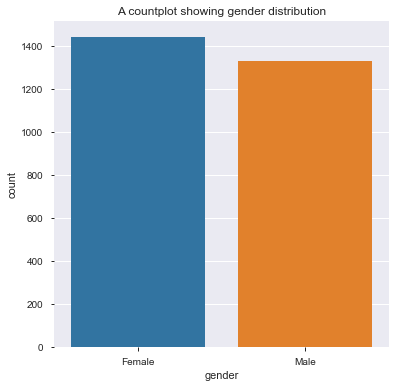

In [27]:
plt.figure(figsize=(6,6))
plt.title('A countplot showing gender distribution')
sns.countplot(x='gender', data=data)
plt.show()

### Findings
   - Most buyers are female

### Job_industry_category

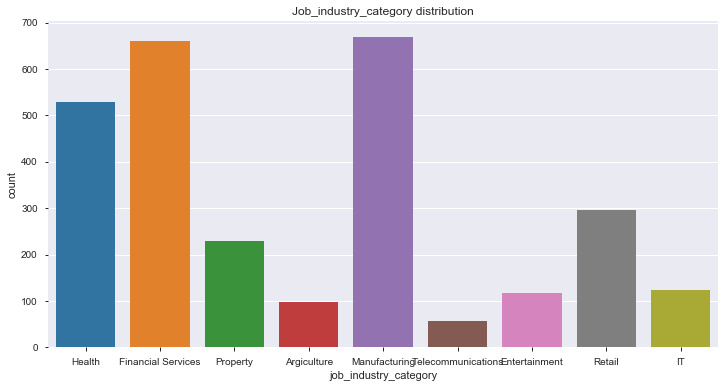

In [28]:
plt.figure(figsize=(12,6))
plt.title('Job_industry_category distribution')
sns.countplot(x='job_industry_category', data =data)
plt.show()

### Findings
        - Manufacturing industry had the highest number of buyers
        - Telecommunication industry has the lowest number of buyers

## Wealth_segment

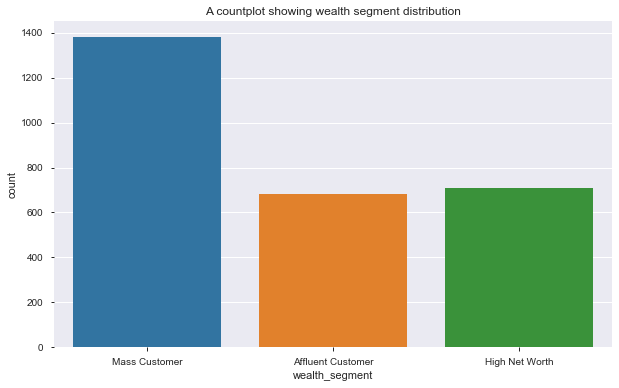

In [29]:
plt.figure(figsize=(10,6))
plt.title('A countplot showing wealth segment distribution')
sns.countplot(x='wealth_segment', data =data)
plt.show()

### Findings
        - Most buyers come from the mass customer wealth segment

## Owns_car

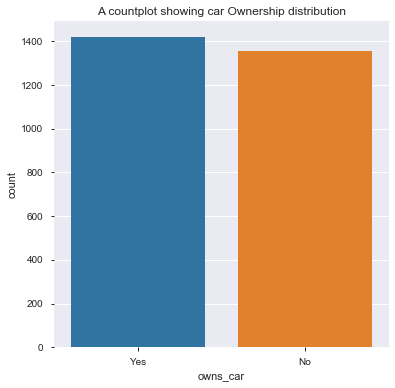

In [30]:
plt.figure(figsize=(6,6))
plt.title('A countplot showing car Ownership distribution')
sns.countplot(x='owns_car', data =data)
plt.show()

### findings
       - majority of buyers owns cars

## Job_title

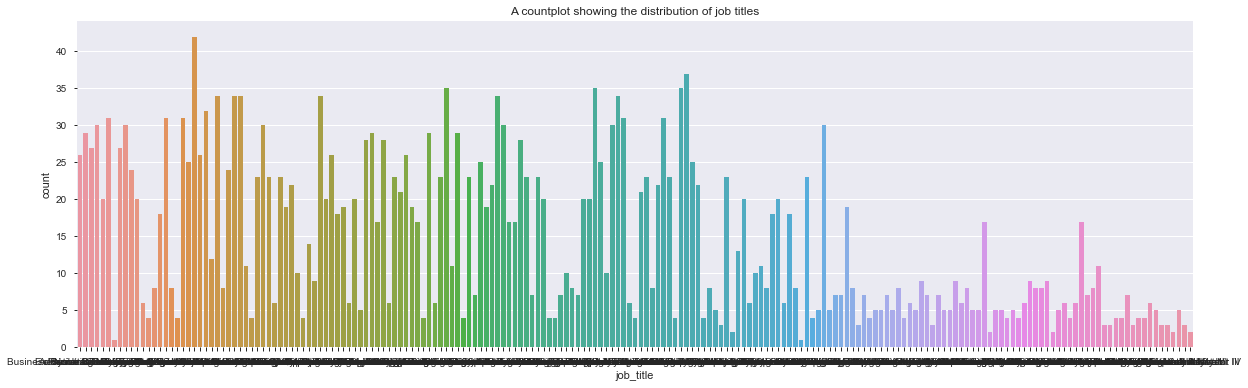

In [31]:
# job_title
plt.figure(figsize=(20,6))
plt.title('A countplot showing the distribution of job titles')
sns.countplot(x='job_title', data=data)
plt.show()

In [32]:
data['job_title'].value_counts()

Social Worker                 42
Sales Representative          37
Chemical Engineer             35
Desktop Support Technician    35
Dental Hygienist              35
                              ..
Research Assistant III         2
Programmer Analyst IV          2
Database Administrator I       2
Database Administrator II      1
Developer I                    1
Name: job_title, Length: 195, dtype: int64

### deceased_indicator

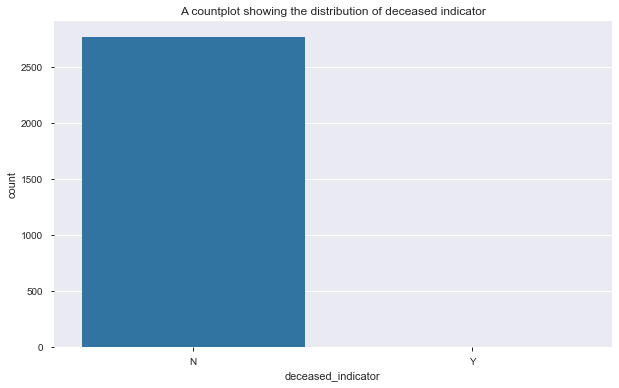

In [33]:
plt.figure(figsize=(10,6))
plt.title('A countplot showing the distribution of deceased indicator')
sns.countplot(x='deceased_indicator', data=data)
plt.show()

### Findings
    - most buyers are alive

## Tenure

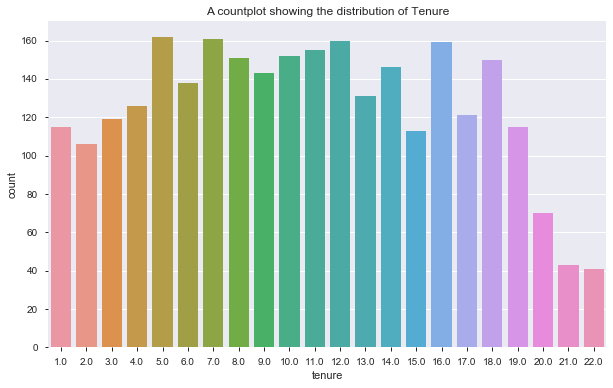

In [34]:
plt.figure(figsize=(10,6))
plt.title('A countplot showing the distribution of Tenure')
sns.countplot(x='tenure', data=data)
plt.show()

## age

In [35]:
#getting the current year
now = date.today()
cur_year = now.year

In [36]:
# a function to calculate the age of the buyer
def cal_age():
    for a in data.year:
        age = cur_year -a
        yield age

In [37]:
# listing the ages of the buyers
b = list(cal_age())
print(b)

[67, 40, 66, 47, 32, 26, 65, 37, 20, 19, 40, 40, 43, 44, 42, 42, 47, 52, 58, 25, 57, 35, 65, 41, 39, 44, 43, 37, 39, 45, 28, 40, 61, 66, 54, 64, 24, 53, 61, 55, 42, 44, 18, 27, 35, 48, 42, 42, 31, 35, 52, 42, 55, 53, 31, 46, 54, 53, 36, 65, 40, 44, 46, 60, 52, 41, 64, 22, 52, 45, 64, 23, 42, 19, 30, 45, 35, 39, 21, 38, 42, 63, 41, 32, 25, 60, 28, 46, 43, 35, 23, 56, 57, 43, 23, 45, 47, 33, 35, 26, 66, 53, 63, 23, 35, 47, 25, 37, 55, 39, 43, 35, 41, 46, 33, 56, 41, 44, 21, 36, 65, 63, 45, 50, 32, 23, 31, 45, 28, 31, 54, 49, 38, 28, 23, 49, 46, 45, 39, 41, 42, 56, 46, 62, 54, 39, 42, 63, 54, 57, 56, 44, 62, 26, 57, 19, 24, 63, 46, 25, 27, 56, 66, 40, 42, 53, 43, 43, 47, 34, 66, 25, 33, 34, 51, 44, 66, 46, 28, 31, 33, 28, 44, 19, 29, 37, 42, 28, 37, 23, 59, 66, 45, 28, 37, 41, 35, 43, 55, 31, 42, 66, 29, 33, 44, 39, 48, 31, 29, 34, 43, 31, 35, 50, 49, 31, 61, 64, 64, 64, 40, 46, 51, 46, 47, 36, 37, 46, 35, 63, 62, 33, 58, 62, 44, 46, 51, 23, 43, 47, 34, 49, 40, 52, 29, 36, 61, 22, 42, 55,

In [38]:
data['age'] = b

In [39]:
data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,day,age
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,12,67
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,16,40
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,20,66
8,9,Mala,Lind,Female,97,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,10,47
9,10,Fiorenze,Birdall,Female,49,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,11,32


In [40]:
data['age_bins'] = pd.cut(x=data.age, bins=[10,19,29,39,49,59,69,79])

In [41]:
# confirming the new columns
data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,day,age,age_bins
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,12,67,"(59, 69]"
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,16,40,"(39, 49]"
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,20,66,"(59, 69]"
8,9,Mala,Lind,Female,97,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,10,47,"(39, 49]"
9,10,Fiorenze,Birdall,Female,49,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,11,32,"(29, 39]"


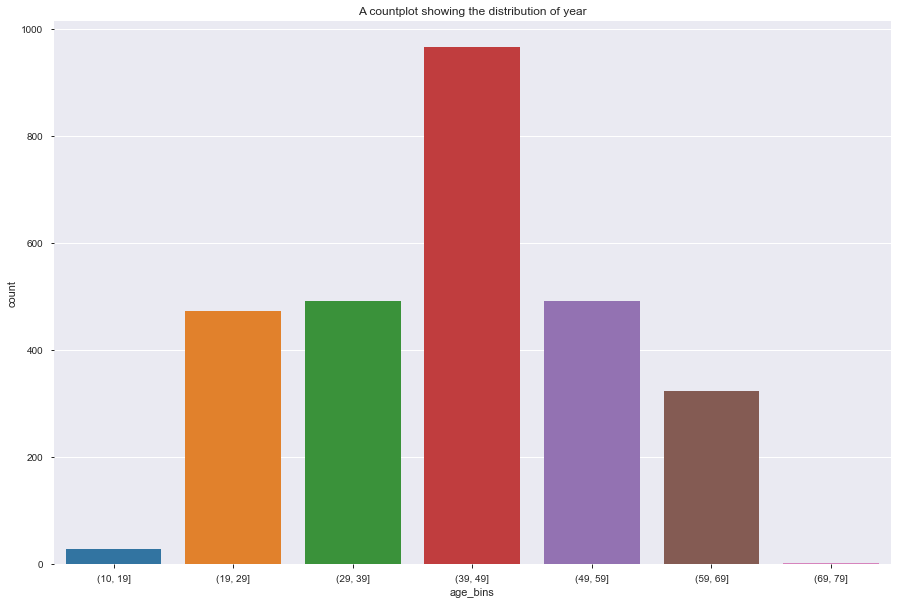

In [42]:
plt.figure(figsize=(15,10))
plt.title('A countplot showing the distribution of year')
sns.countplot(x='age_bins', data=data)
plt.show()

### Findings
    - most of the buyers are between the age of 39 -49

## Bivariate Analysis

### Pairplot

<Figure size 720x432 with 0 Axes>

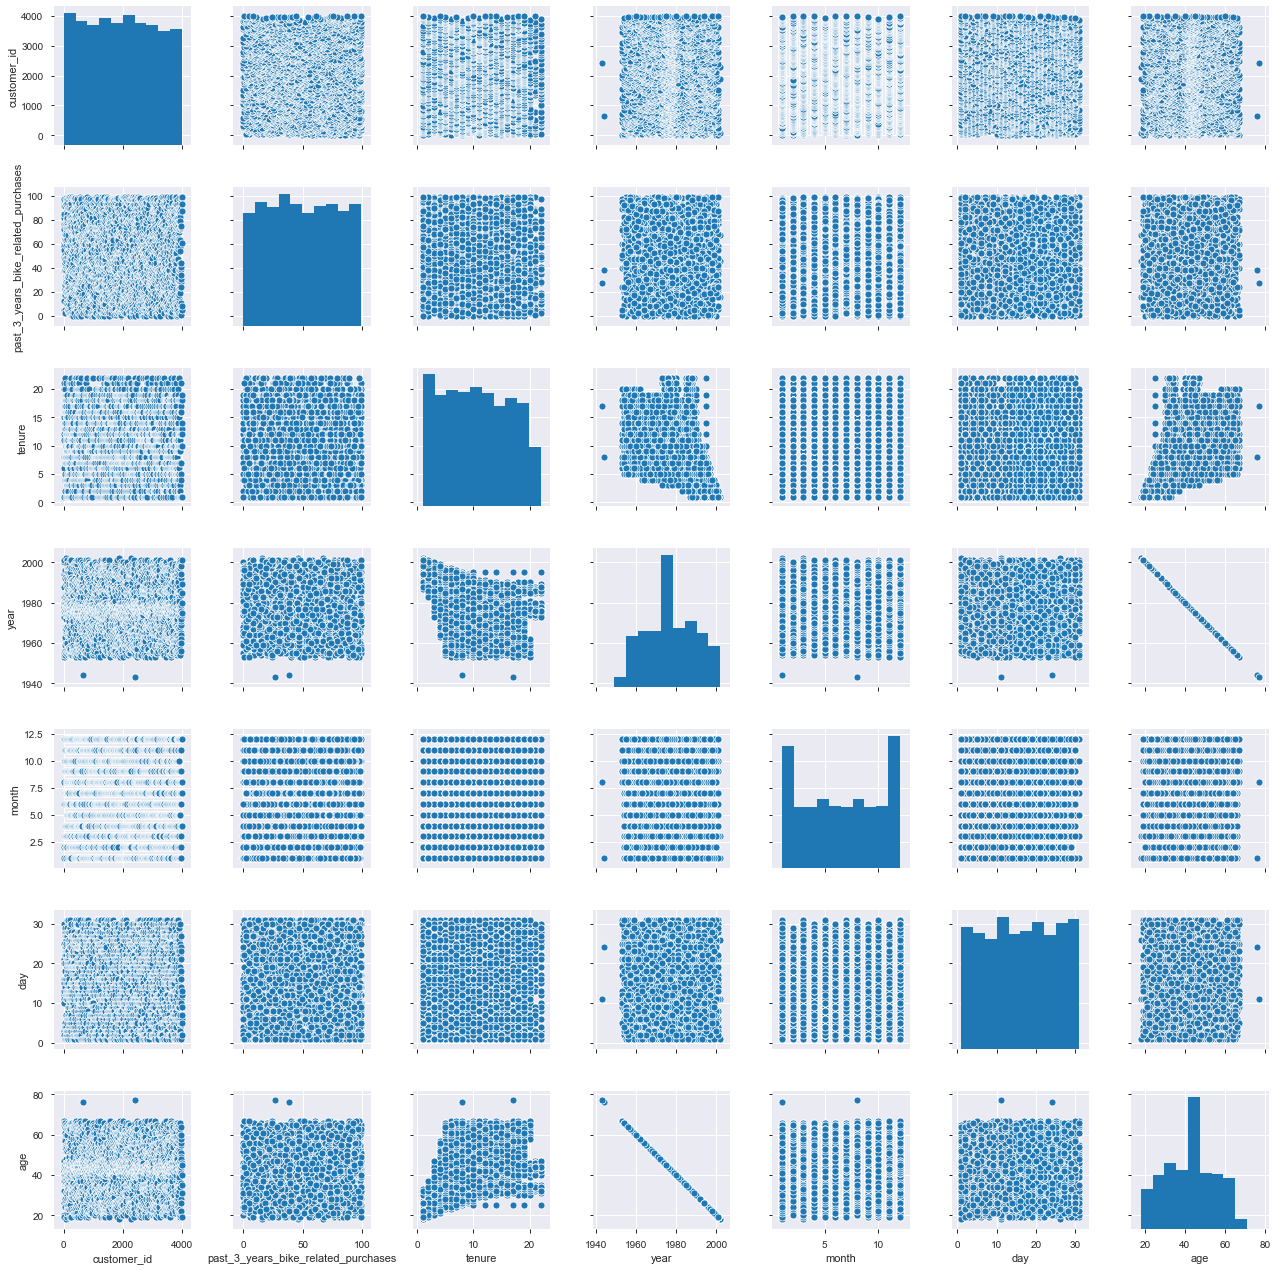

In [43]:
plt.figure(figsize=(10,6))
sns.pairplot(data)
plt.show()


### Heatmap

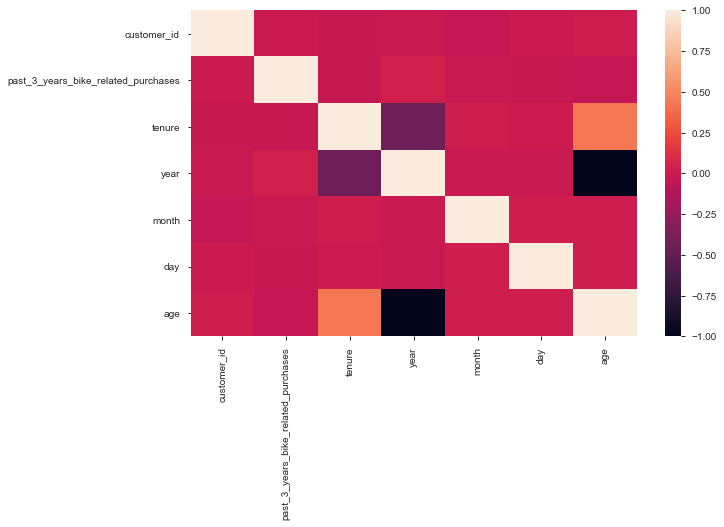

In [44]:
plt.figure(figsize=(10,6))
data1= data.corr()
sns.heatmap(data1)
plt.show()

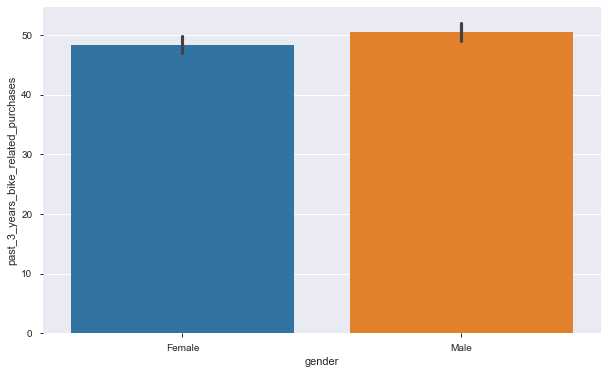

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(data['gender'], data['past_3_years_bike_related_purchases'])
plt.xlabel('gender')
plt.ylabel('past_3_years_bike_related_purchases')
plt.show()

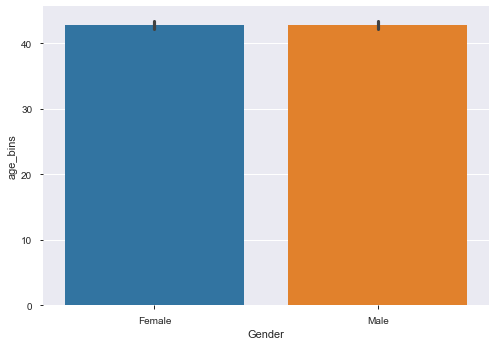

In [54]:
sns.barplot(data['gender'], data['age'])
plt.xlabel('Gender')
plt.ylabel('age_bins')
plt.show()